## Librerias

In [1]:
# Imagenes
from PIL import Image
import matplotlib.pyplot as plt

# Datos
import numpy as np

# Cifrado
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

In [2]:
# Cargar la imagen
image = Image.open("tux.bmp")
print(f"Tamaño de la imagen: {image.size[0]} x {image.size[1]} px")

# Convertir la imagen a un array de numpy 
# cambiandola a la forma (405, 480, 4)
image_array = np.array(image)
image_reshaped = image_array.reshape((405, 480, 4))

# Convertir el array a un array de bytes
image_bytes = image_reshaped.tobytes()
print(f"Tamaño de la imagen en bytes: {len(image_bytes)}")

Tamaño de la imagen: 405 x 480 px
Tamaño de la imagen en bytes: 777600


In [3]:
# Clave de 16 bytes (128 bits)
key = get_random_bytes(16)
print(f"Clave: {key}")

# Cifrado AES modo ECB
ecb_cipher = AES.new(key, AES.MODE_ECB)

# Rellenar los bytes para que sean multiplos de 16
image_bytes_padded = pad(image_bytes, AES.block_size)

# Cifrar la imagen
image_bytes_encrypted = ecb_cipher.encrypt(image_bytes_padded)
print(f"Tamaño de la imagen cifrada en bytes: {len(image_bytes_encrypted)}")

Clave: b'D$\x913W*\x86&\x8d\xcc\xd3\xad\x05\xcb\xde\xf8'
Tamaño de la imagen cifrada en bytes: 777616


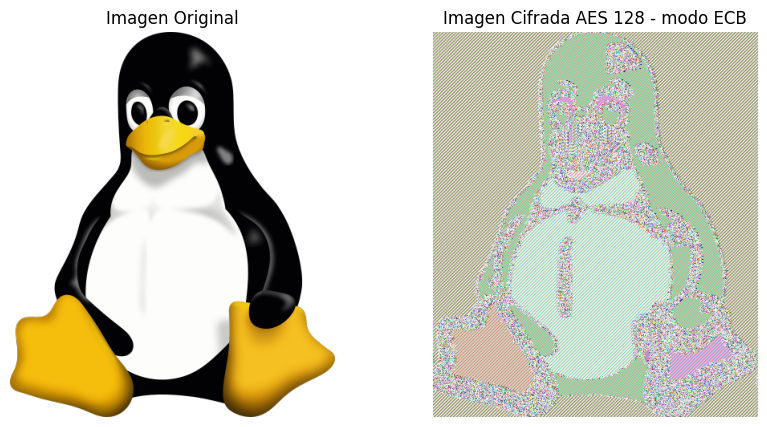

In [4]:
# Guardar la imagen cifrada
image_encrypted = Image.frombytes("RGBA", (405, 480), image_bytes_encrypted)
image_encrypted.save("tux_aes.bmp")

# Comparar la imagen original con la cifrada con AES
# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen original
axes[0].imshow(image)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Mostrar la imagen cifrada
axes[1].imshow(image_encrypted)
axes[1].set_title('Imagen Cifrada AES 128 - modo ECB')
axes[1].axis('off')

plt.show()